<a href="https://colab.research.google.com/github/ppriatiningtyaz/credit-score-HCI/blob/master/CreditScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Task Virtual Internship Experience : Home Credit Indonesia**

## **Credit Score Prediction**

Logistic Regression


Hai, I am Puspita, in this notebook we will explore loan dataset from Home Credit Indonesia


### **Problem Statement :**
### About Company 
PT Home Credit Indonesia or better known as Home Credit is a multinational multipurpose finance company. This company provides in-store financing services (non-cash financing directly on the spot) for consumers who want to buy products such as household appliances, electronic equipment, mobile phones, and furniture. The company also builds technology-based financing services. Established in 2013 in Jakarta, currently Home Credit has reached more than 19,000 distribution points spread across 144 cities in Indonesia. As of March 2019, this company has served 3.4 million customers online and offline.


### Problem
Home Credit suffered huge losses from customers who failed to pay. Home Credit is currently using various statistical methods and Machine Learning to make credit score predictions. Now, we're about to unlock the full potential of our data. By doing so, we can ensure that customers who are able to make repayments are not rejected when applying for loans, and loans can be provided with principal, maturity, and repayment calendars that will motivate customers to succeed. And here we will minimize these losses with a predictive model to predict customers who have the failed to pay potential. Customers submissions that have the potential to fail to pay will be rejected.

### Installing scorecardpy package
[scorecardpy package documentation from PyPI](https://pypi.org/project/scorecardpy/)

In [2]:
!pip install scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57843 sha256=0856fa66e1b2a18cf8afcb175ca328fb57c1510d65db6ba50962c06cc1df904d
  Stored in directory: /root/.cache/pip/wheels/18/b9/40/9fc7fa3ee628a20fb571991f96d54997cfbfab13e752bacd84
Successfully built scorecardpy


### Import pandas, scorecardpy and read dataset

In [4]:
import pandas as pd
import scorecardpy as sc

df_train = pd.read_csv('/content/application_train.csv')

### Dataset Information
We need to know information about the columns in this table so we can determine what features to use to create a credit score

In [5]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Feature Selection

In [6]:
df_train.drop(df_train.iloc[:, 16:29], inplace=True, axis=1)
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 109 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   CNT_FAM_MEMBERS               float64
 17   REGION_RATING_CLIENT          int64  
 18   RE

In [7]:
df_train.drop(df_train.iloc[:, 19:109], inplace=True, axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Filter variable via missing rate, iv, identical value rate

In [85]:
dt_s = sc.var_filter(df_train, y="TARGET")
dt_s.info()

[INFO] filtering variables ...
Variable filtering on 307511 rows and 19 columns in 00:04:31 
8 variables are removed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   REGION_RATING_CLIENT         307511 non-null  int64  
 1   AMT_GOODS_PRICE              307233 non-null  float64
 2   AMT_INCOME_TOTAL             307511 non-null  float64
 3   NAME_INCOME_TYPE             307511 non-null  object 
 4   AMT_CREDIT                   307511 non-null  float64
 5   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 6   AMT_ANNUITY                  307499 non-null  float64
 7   CODE_GENDER                  307511 non-null  object 
 8   NAME_FAMILY_STATUS           307511 non-null  object 
 9   NAME_EDUCATION_TYPE          307511 non-null  object 
 10  TARGET                       307511 non-null  int64  
dtype

### Split the data into an independent variable X and a target variable y

In [86]:
X = dt_s.loc[:,dt_s.columns != 'TARGET']
y = dt_s.loc[:,dt_s.columns == 'TARGET']

### Breaking into train test

In [11]:
train, test = sc.split_df(dt_s, 'TARGET').values()
print(train.shape)
print(test.shape)

(215258, 11)
(92253, 11)


### Cleaning Data 1
Clean dataset from NaN value and reset index

In [12]:
dt_s = dt_s.dropna()
dt_s = dt_s.reset_index(drop=True)
dt_s

,REGION_RATING_CLIENT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,AMT_CREDIT,REGION_RATING_CLIENT_W_CITY,AMT_ANNUITY,CODE_GENDER,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,TARGET
0,2,351000.0,202500.0,Working,406597.5,2,24700.5,M,Single / not married,Secondary / secondary special,1
1,1,1129500.0,270000.0,State servant,1293502.5,1,35698.5,F,Married,Higher education,0
2,2,135000.0,67500.0,Working,135000.0,2,6750.0,M,Single / not married,Secondary / secondary special,0
3,2,297000.0,135000.0,Working,312682.5,2,29686.5,F,Civil marriage,Secondary / secondary special,0
4,2,513000.0,121500.0,Working,513000.0,2,21865.5,M,Single / not married,Secondary / secondary special,0
...,...,...,...,...,...,...,...,...,...,...,...
307216,1,225000.0,157500.0,Working,254700.0,1,27558.0,M,Separated,Secondary / secondary special,0
307217,2,225000.0,72000.0,Pensioner,269550.0,2,12001.5,F,Widow,Secondary / secondary special,0
307218,3,585000.0,153000.0,Working,677664.0,3,29979.0,F,Separated,Higher education,0
307219,2,319500.0,171000.0,Commercial associate,370107.0,2,20205.0,F,Married,Secondary / secondary special,1


### Weight of Evidence Binning

In [13]:
bins = sc.woebin(dt_s, y="TARGET")

[INFO] creating woe binning ...


/usr/local/lib/python3.8/dist-packages/scorecardpy/woebin.py:437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binning_1bst_brk['total_iv'] = iv_01(binning_1bst_brk.good, binning_1bst_brk.bad)
/usr/local/lib/python3.8/dist-packages/scorecardpy/woebin.py:438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binning_1bst_brk['bstbrkp'] = [float(re.match("^\[(.*),.+", i).group(1)) for i in binning_1bst_brk['bstbin']]


Binning on 307221 rows and 11 columns in 00:00:19


### Graphic plot display the binning results for each variable

{'REGION_RATING_CLIENT': <Figure size 432x288 with 2 Axes>,
 'NAME_INCOME_TYPE': <Figure size 432x288 with 2 Axes>,
 'AMT_CREDIT': <Figure size 432x288 with 2 Axes>,
 'REGION_RATING_CLIENT_W_CITY': <Figure size 432x288 with 2 Axes>,
 'AMT_GOODS_PRICE': <Figure size 432x288 with 2 Axes>,
 'AMT_ANNUITY': <Figure size 432x288 with 2 Axes>,
 'CODE_GENDER': <Figure size 432x288 with 2 Axes>,
 'AMT_INCOME_TOTAL': <Figure size 432x288 with 2 Axes>,
 'NAME_FAMILY_STATUS': <Figure size 432x288 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 432x288 with 2 Axes>}

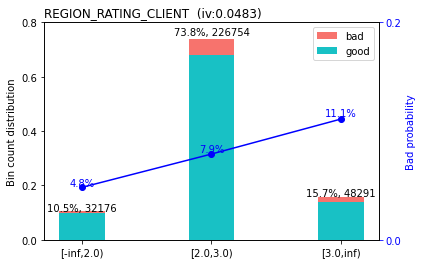

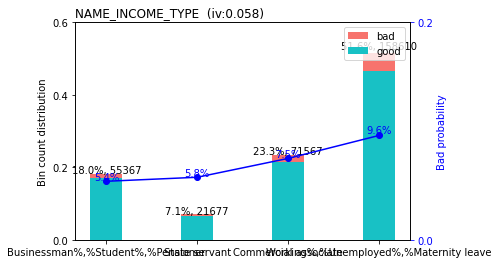

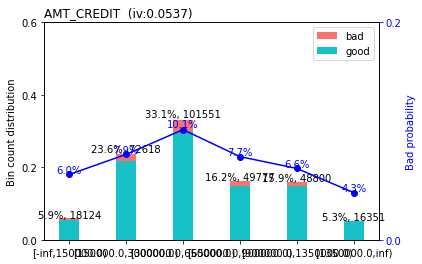

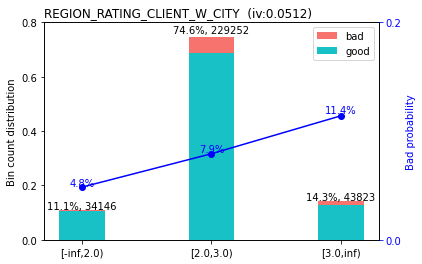

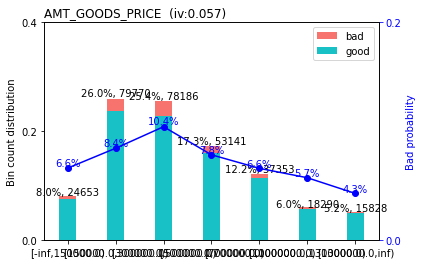

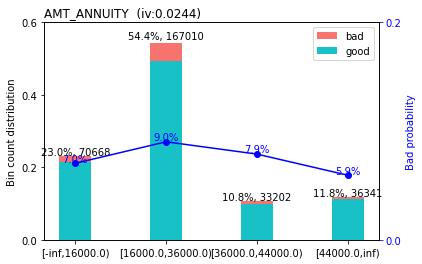

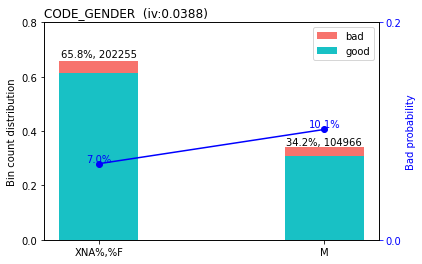

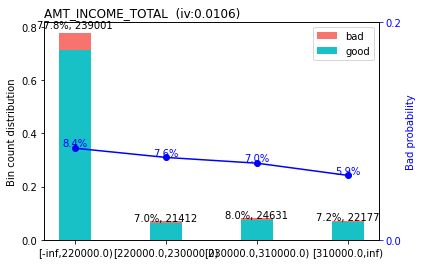

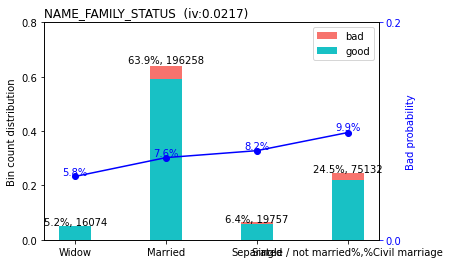

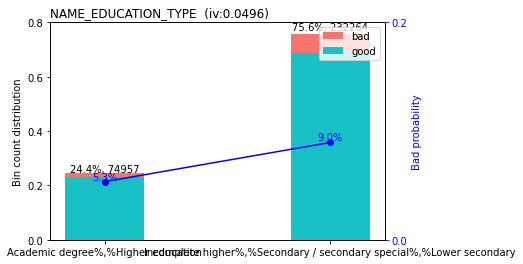

In [14]:
sc.woebin_plot(bins)

### Converting train and test into woe values

In [87]:
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


### Cleaning Data 2
Clean dataset from NaN value and infinite value

In [89]:
import numpy as np
train_woe = train_woe.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
test_woe = test_woe.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

### Separate Train/Test into independent variable X and target variable y

In [90]:
y_train = train_woe.loc[:,'TARGET']
X_train = train_woe.loc[:,train_woe.columns != 'TARGET']
y_test = test_woe.loc[:,'TARGET']
X_test = test_woe.loc[:,train_woe.columns != 'TARGET']


### Logistic Regression Modeling

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[0.1724553  0.76133111 0.34482866 0.73174742 0.4606553  0.27796318
  0.86364975 0.10603998 0.76181466 0.81837216]]
[-2.43286205]


### Using the LR model to predict the probability of a sample being bad

In [80]:
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

### Score Card and Score

In [93]:
# Score Card
card = sc.scorecard(bins, lr, X_train.columns)

# Score
train_score = sc.scorecard_ply(train, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)
test_score = sc.scorecard_ply(test, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)
score = sc.scorecard_ply(df_train, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)

### Show Score Card

In [82]:
card

{'basepoints':      variable  bin  points
 0  basepoints  NaN     563,
 'REGION_RATING_CLIENT':                variable         bin  points
 0  REGION_RATING_CLIENT  [-inf,2.0)     7.0
 1  REGION_RATING_CLIENT   [2.0,3.0)     0.0
 2  REGION_RATING_CLIENT   [3.0,inf)    -4.0,
 'NAME_INCOME_TYPE':            variable                                     bin  points
 3  NAME_INCOME_TYPE       Businessman%,%Student%,%Pensioner    24.0
 4  NAME_INCOME_TYPE                           State servant    20.0
 5  NAME_INCOME_TYPE                    Commercial associate     5.0
 6  NAME_INCOME_TYPE  Working%,%Unemployed%,%Maternity leave   -10.0,
 'AMT_CREDIT':       variable                   bin  points
 7   AMT_CREDIT       [-inf,150000.0)     8.0
 8   AMT_CREDIT   [150000.0,300000.0)     1.0
 9   AMT_CREDIT   [300000.0,650000.0)    -6.0
 10  AMT_CREDIT   [650000.0,900000.0)     1.0
 11  AMT_CREDIT  [900000.0,1350000.0)     6.0
 12  AMT_CREDIT       [1350000.0,inf)    16.0,
 'REGION_RATING_CLIEN

### Show overall dataset score

In [83]:
score

,REGION_RATING_CLIENT_points,NAME_INCOME_TYPE_points,AMT_CREDIT_points,REGION_RATING_CLIENT_W_CITY_points,AMT_GOODS_PRICE_points,AMT_ANNUITY_points,CODE_GENDER_points,AMT_INCOME_TOTAL_points,NAME_FAMILY_STATUS_points,NAME_EDUCATION_TYPE_points,score
0,0.0,-10.0,-6.0,1.0,-9.0,-2.0,-16.0,-0.0,-12.0,-7.0,502.0
1,7.0,20.0,6.0,29.0,12.0,-2.0,10.0,1.0,4.0,26.0,676.0
2,0.0,-10.0,8.0,1.0,7.0,3.0,-16.0,-0.0,-12.0,-7.0,537.0
3,0.0,-10.0,-6.0,1.0,-2.0,-2.0,10.0,-0.0,-12.0,-7.0,535.0
4,0.0,-10.0,-6.0,1.0,1.0,-2.0,-16.0,-0.0,-12.0,-7.0,512.0
...,...,...,...,...,...,...,...,...,...,...,...
307506,7.0,-10.0,1.0,29.0,-2.0,-2.0,-16.0,-0.0,-1.0,-7.0,562.0
307507,0.0,24.0,1.0,1.0,-2.0,3.0,10.0,-0.0,19.0,-7.0,612.0
307508,-4.0,-10.0,1.0,-20.0,1.0,-2.0,10.0,-0.0,-1.0,26.0,564.0
307509,0.0,5.0,-6.0,1.0,-9.0,-2.0,10.0,-0.0,4.0,-7.0,559.0


### Model Stability Index: PSI

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


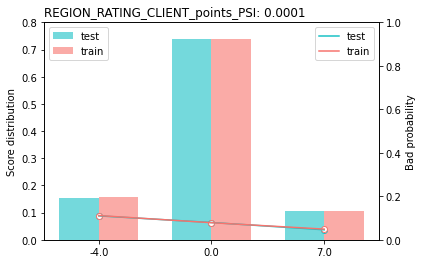

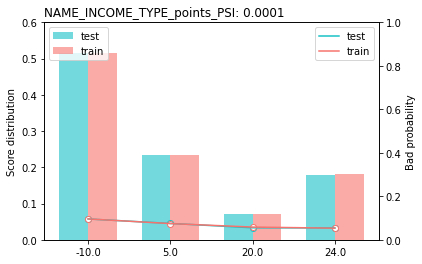

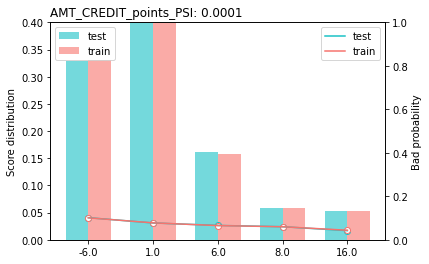

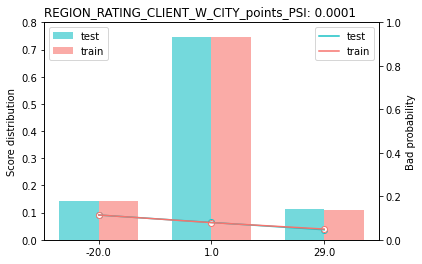

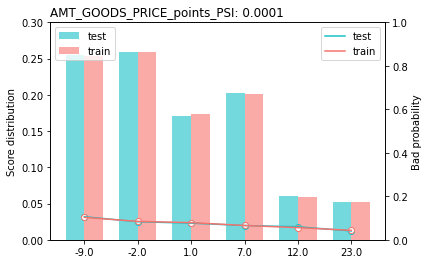

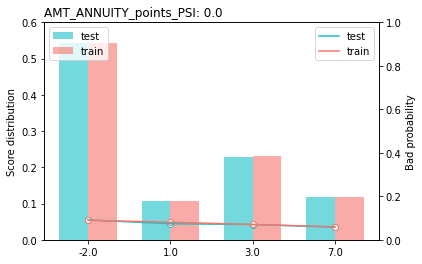

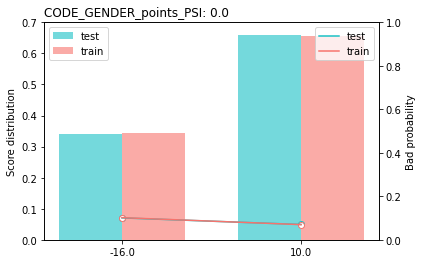

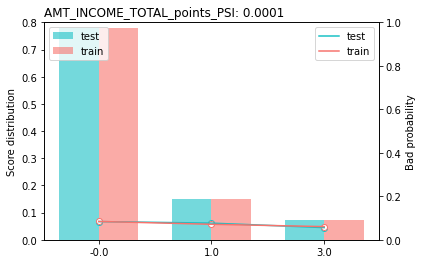

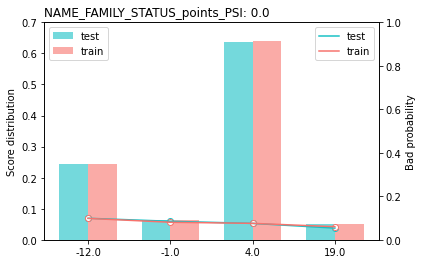

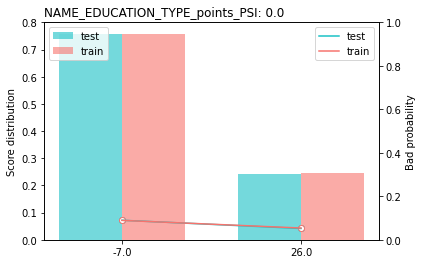

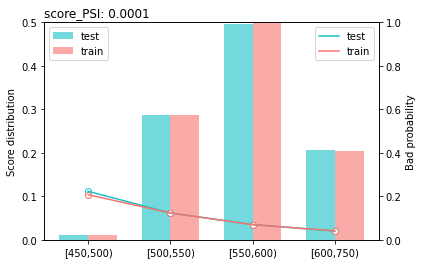

{'psi':                               variable       PSI
 0          REGION_RATING_CLIENT_points  0.000052
 1              NAME_INCOME_TYPE_points  0.000056
 2                    AMT_CREDIT_points  0.000079
 3   REGION_RATING_CLIENT_W_CITY_points  0.000054
 4               AMT_GOODS_PRICE_points  0.000059
 5                   AMT_ANNUITY_points  0.000026
 6                   CODE_GENDER_points  0.000033
 7              AMT_INCOME_TOTAL_points  0.000072
 8            NAME_FAMILY_STATUS_points  0.000008
 9           NAME_EDUCATION_TYPE_points  0.000004
 10                               score  0.000068,
 'pic': {'REGION_RATING_CLIENT_points': <Figure size 432x288 with 2 Axes>,
  'NAME_INCOME_TYPE_points': <Figure size 432x288 with 2 Axes>,
  'AMT_CREDIT_points': <Figure size 432x288 with 2 Axes>,
  'REGION_RATING_CLIENT_W_CITY_points': <Figure size 432x288 with 2 Axes>,
  'AMT_GOODS_PRICE_points': <Figure size 432x288 with 2 Axes>,
  'AMT_ANNUITY_points': <Figure size 432x288 with 2 Axes>

In [84]:
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)